Feature shape: (1797, 64)
Target shape: (1797,)


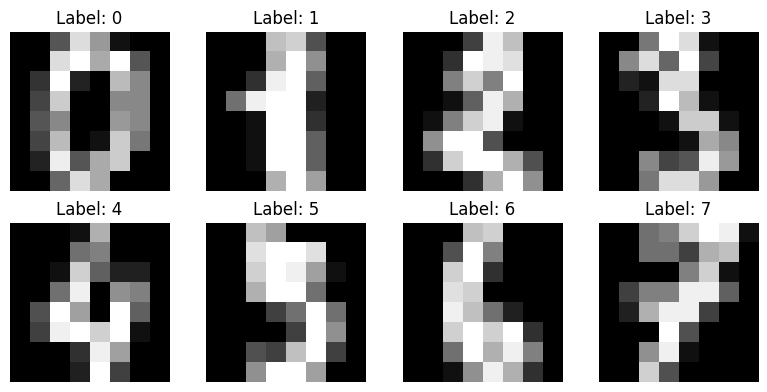

Accuracy with K=3: 0.9667
K=3, Accuracy=0.9667
K=5, Accuracy=0.9639
K=7, Accuracy=0.9667
K=9, Accuracy=0.9639


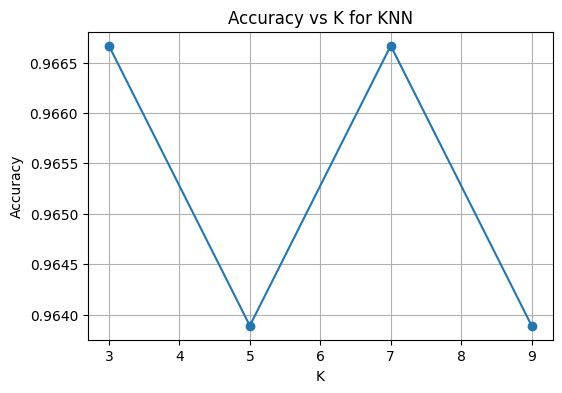

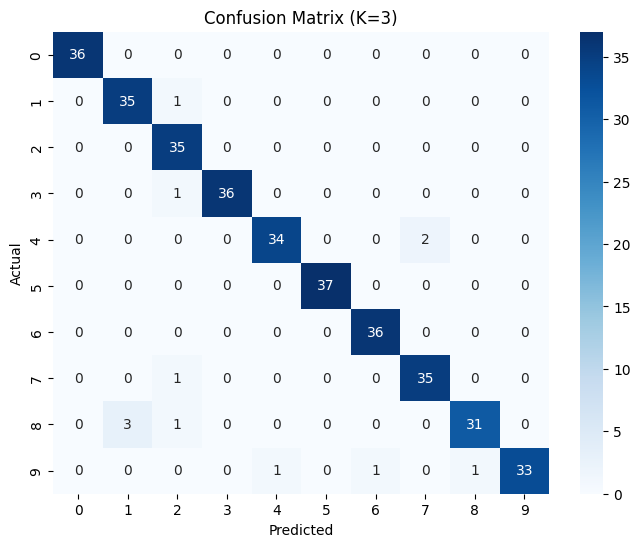

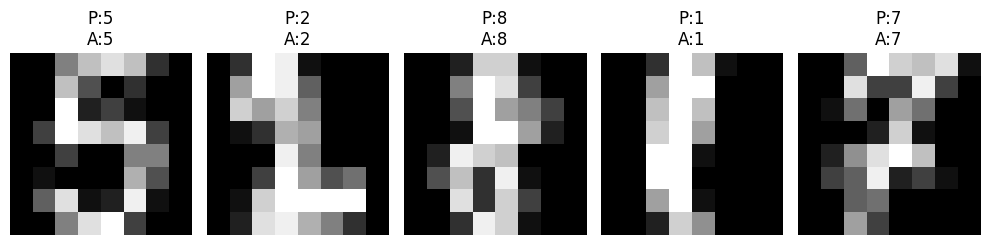

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.90      1.00      0.95        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       0.97      0.89      0.93        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [1]:
# KNN – Handwritten Digit Classification


# 1️⃣ Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2️⃣ Load Digits Dataset

digits = load_digits()
X, y = digits.data, digits.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


# 3️⃣ Visualize Sample Digits

plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# 4️⃣ Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 5️⃣ Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 6️⃣ Train KNN with K=3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with K=3: {acc:.4f}")

# 7️⃣ Try Multiple K Values

k_values = [3, 5, 7, 9]
accuracy_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")


# 8️⃣ Plot Accuracy vs K

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracy_list, marker='o')
plt.title("Accuracy vs K for KNN")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


# 9️⃣ Confusion Matrix for Best K

best_k = k_values[np.argmax(accuracy_list)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🔟 Display 5 Test Images with Predictions

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"P:{y_pred_best[i]}\nA:{y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 1️⃣1️⃣ Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred_best))


🔹 Task: Handwritten Digit Classification using KNN
🎯 Objective

Classify handwritten digits using K-Nearest Neighbors (KNN).

Understand distance-based classification and the effect of K on performance.

Handle feature scaling and evaluate model using accuracy, confusion matrix, and classification report.

🛠️ Tools Used

Python

Scikit-learn

Matplotlib & Seaborn

NumPy

⚙️ Techniques Applied

Loaded built-in Sklearn Digits dataset and explored shapes.

Visualized sample digit images to confirm labels.

Split dataset into training and testing sets.

Applied StandardScaler to normalize features for KNN.

Trained KNN with K=3 as baseline.

Tuned K values (3, 5, 7, 9) and recorded accuracy.

Plotted Accuracy vs K to select the best K.

Generated confusion matrix to identify misclassifications.

Displayed sample test images with predicted labels.

📊 Evaluation Metrics

Accuracy

Confusion Matrix

Classification Report (Precision, Recall, F1-Score)

📦 Deliverables

Jupyter Notebook

Accuracy vs K plot

Confusion matrix

Sample predictions on test images

✅ Final Outcome

Learned distance-based classification with KNN.

Understood importance of feature scaling and K tuning.

Successfully visualized and evaluated handwritten digit classification.